# Machine Learning Project for CS504
### Professor: Dr. Jessica Lin
### Student: Angel N. Sierra
### GMU

**Research Article Title:** Data driven prediction models of energy use of appliances in a low-energy house
**Researchers:** Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix

#### General Data Analysis and Data Preparation
This section would provide the initial analysis and data preparation performed by the researchers with the end goal of ensuring a common baseline. Once baseline comparison is performed I would proceed to augment the research by adding a new machine learning algorithm and executing similar activities in WEKA to compare results.

#### Machine Learning: Full Data Set
This section was created to execute all the ML algorithms on the full data set to establish a baseline.

**NOTE:** To avoid changing the data frame name in all the lines of codes generated for the data set, I will keep the same data frame name (i.e., new_test_data_set) and just change the uploaded file in the read.csv function. This approach will minimize syntax error issues.

In [1]:
#import necessary libraries
suppressWarnings(library(lubridate))

#Uploading Test Data Set adjusted for ML algorithms execution
new_test_data_set <- read.csv("00 - Data Set/01_new_full_data_set.csv")
new_test_data_set$date <- strptime(as.character(new_test_data_set$date),format="%Y-%m-%d %H:%M:%S")
new_test_data_set$date <- as.POSIXct(new_test_data_set$date,tz="UTC")
str(new_test_data_set)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



'data.frame':	19735 obs. of  39 variables:
 $ date                : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances          : int  60 60 50 50 60 50 60 60 60 70 ...
 $ lights              : int  30 30 30 40 40 40 50 50 40 40 ...
 $ T1                  : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1                : num  47.6 46.7 46.3 46.1 46.3 ...
 $ T2                  : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2                : num  44.8 44.7 44.6 44.6 44.5 ...
 $ T3                  : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3                : num  44.7 44.8 44.9 45 45 ...
 $ T4                  : num  19 19 18.9 18.9 18.9 ...
 $ RH_4                : num  45.6 46 45.9 45.7 45.5 ...
 $ T5                  : num  17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5                : num  55.2 55.2 55.1 55.1 55.1 ...
 $ T6                  : num  7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6                : num  84.3 84.1 83.2 83.4 84.9 ...
 $ T7                  : num  17.2 17.2 1

In [2]:
#Import necessary libraries
suppressWarnings(library(caret))
suppressWarnings(library(doParallel))

#Define control for the recursive feature elimination
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

set.seed(1)
registerDoParallel(8)
getDoParWorkers()
ptm <- proc.time()

Loading required package: lattice
Loading required package: ggplot2
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


[1] 8

In [3]:
rfe_results_test_set <- rfe(new_test_data_set[,c(3:37)],new_test_data_set[,2], sizes=c(1:35), rfeControl=control)

In [12]:
print(rfe_results_test_set)
capture.output(rfe_results_test_set,
               file="01 - ML Algorithms/00 - Recursive Feature Selection/00-RFE_Results_Test_Data.txt")


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD  MAESD Selected
         1 94.63   0.1471 51.86  5.278    0.01216 1.8825         
         2 93.85   0.1655 51.11  4.969    0.01433 1.4574         
         3 91.46   0.2151 49.48  5.608    0.03673 1.8165         
         4 86.99   0.3115 46.55  4.931    0.02442 1.4467         
         5 82.93   0.3936 43.52  4.934    0.02462 1.5083         
         6 67.90   0.5725 32.58  3.942    0.02100 1.3667         
         7 67.44   0.5777 32.05  4.113    0.01865 1.4085         
         8 67.71   0.5751 32.08  4.233    0.02080 1.3863         
         9 66.94   0.5815 31.61  3.824    0.02288 1.1111         
        10 67.09   0.5800 31.57  3.722    0.02213 1.0588         
        11 66.96   0.5828 31.55  3.747    0.02438 1.0187         
        12 66.70   0.5849 31.37  3.915    0.02234 1.0518         
        13 66.33 

In [13]:
selectedVars <- rfe_results_test_set$variables
capture.output(selectedVars,
               file="01 - ML Algorithms/00 - Recursive Feature Selection/01-RFE_Selected_Features_Test_Data.txt")

bestFeature35 <- rfe_results_test_set$control$functions$selectVar(selectedVars,35)
capture.output(bestFeature35,
               file="01 - ML Algorithms/00 - Recursive Feature Selection/02-RFE_Best_35_Features_Test_Data.txt")

bestFeature35

[1] "NSM"                 "lights"              "RH_5"               
 [4] "Press_mm_hg"         "T3"                  "T8"                 
 [7] "T5"                  "RH_3"                "Tdewpoint"          
[10] "RH_1"                "Visibility"          "RH_9"               
[13] "T7"                  "RH_7"                "T1"                 
[16] "T9"                  "RH_4"                "RH_2"               
[19] "T4"                  "T2"                  "T_out"              
[22] "RH_6"                "Windspeed"           "RH_8"               
[25] "T6"                  "RH_out"              "Day_of_weekFriday"  
[28] "Day_of_weekMonday"   "Day_of_weekSaturday" "WeekStatusWeekday"  
[31] "Day_of_weekSunday"   "WeekStatusWeekend"   "Day_of_weekThursday"
[34] "rv2"                 "rv1"

png 
  2

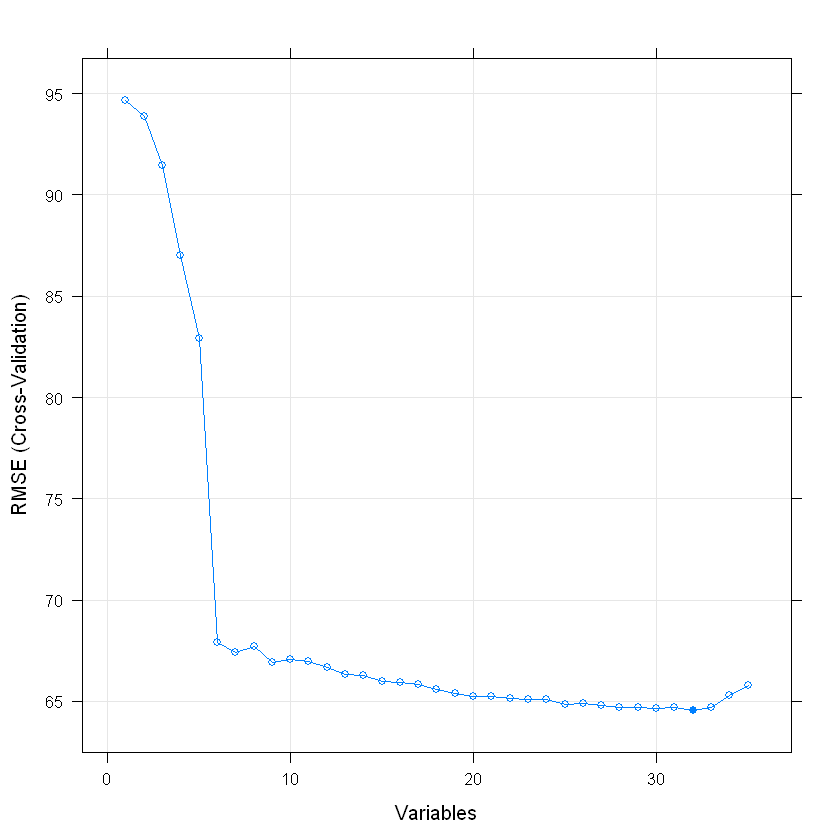

In [14]:
png('01 - ML Algorithms/00 - Recursive Feature Selection/03-RFE_Results_Test_Data_Plot.png',width = 8, height = 6, units = 'in', res = 300)
plot(rfe_results_test_set, type=c("g", "o"))
dev.off()
plot(rfe_results_test_set, type=c("g", "o"))

### Gradient Boosting Model (GBM)
#### 1st ML Algorithm used for regression

**Source:** https://en.wikipedia.org/wiki/Gradient_boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion **like other boosting methods** do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

**note:** Find other boosting methods in WEKA

In [17]:
fitControl <- trainControl(method = "repeatedcv", # cv
                           number=10,repeats=3,  # 10  
                           verboseIter = TRUE,returnResamp = "all")

gbmGrid <-  expand.grid(interaction.depth = c(1,3,5),
                        n.trees = seq(100,10901,400),
                        shrinkage = 0.1,
                        n.minobsinnode = c(10))


set.seed(1)
registerDoParallel(8)
getDoParWorkers()

[1] 8

In [18]:
#Install necessary libraries
suppressWarnings(library(gbm))

ptm <- proc.time()

gbm_model <- train(Appliances~., data=new_test_data_set[,c(2:37)],  method="gbm",
                   metric='RMSE',trControl = fitControl,bag.fraction=0.5,tuneGrid=gbmGrid)
gbm_time <- proc.time() - ptm

Loaded gbm 2.1.4


Aggregating results
Selecting tuning parameters
Fitting n.trees = 10900, interaction.depth = 5, shrinkage = 0.1, n.minobsinnode = 10 on full training set
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1    10183.6492             nan     0.1000  321.7897
     2     9918.7607             nan     0.1000  256.1271
     3     9692.2959             nan     0.1000  212.7740
     4     9496.0385             nan     0.1000  175.9820
     5     9315.0144             nan     0.1000  168.0023
     6     9179.1957             nan     0.1000  127.0626
     7     9053.7627             nan     0.1000  113.9297
     8     8955.7751             nan     0.1000   92.2022
     9     8856.1652             nan     0.1000   86.2904
    10     8779.3738             nan     0.1000   65.9522
    20     8220.5096             nan     0.1000   30.3577
    40     7604.5378             nan     0.1000   16.9130
    60     7262.0105             nan     0.1000    1.8799
    80     6894.3258             n

In [19]:
gbm_model
capture.output(gbm_model, file = "01 - ML Algorithms/01 - ML - GBM/00-GBM_Algorithm_Output.txt")

Stochastic Gradient Boosting 

19735 samples
   35 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 17761, 17762, 17762, 17759, 17761, 17762, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                    100    93.45043  0.1766166  50.89241
  1                    500    89.75482  0.2372168  49.30009
  1                    900    88.47885  0.2576270  49.01290
  1                   1300    87.75230  0.2693118  48.78672
  1                   1700    87.27983  0.2766720  48.64889
  1                   2100    86.91494  0.2824388  48.53081
  1                   2500    86.65831  0.2864165  48.50868
  1                   2900    86.44444  0.2897355  48.46577
  1                   3300    86.25312  0.2927135  48.45013
  1                   3700    86.12212  0.2947218  48.47423
  1                   4100    85.96632  0.2971887  48.46993
  1                   450

In [20]:
gbm_time
capture.output(gbm_time, file = "01 - ML Algorithms/01 - ML - GBM/01-GBM_Algorithm_Time_Output.txt")

   user  system elapsed 
 307.74    0.09 3613.22 

In [21]:
gbm_model$call
capture.output(gbm_model, file = "01 - ML Algorithms/01 - ML - GBM/02-GBM_Algorithm_Model_Output.txt")

train.formula(form = Appliances ~ ., data = new_test_data_set[, 
    c(2:37)], method = "gbm", metric = "RMSE", trControl = fitControl, 
    bag.fraction = 0.5, tuneGrid = gbmGrid)

png 
  2

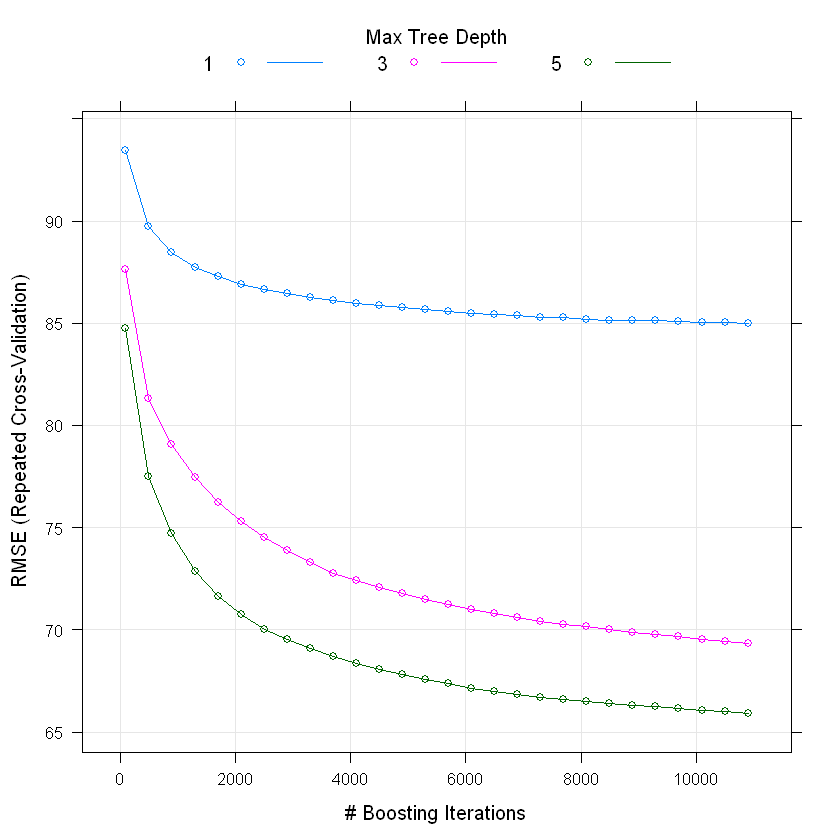

In [22]:
plot(gbm_model)

png('01 - ML Algorithms/01 - ML - GBM/03-GBM_Algorithm_Plot.png',width = 8, height = 6, units = 'in', res = 300)
plot(gbm_model)
dev.off()

In [23]:
varImp(gbm_model)
capture.output(varImp(gbm_model), 
               file = "01 - ML Algorithms/01 - ML - GBM/04-GBM_Algorithm_Feature_Importance_Output.txt")

gbm variable importance

  only 20 most important variables shown (out of 35)

            Overall
NSM          100.00
Press_mm_hg   50.85
RH_2          43.29
RH_1          41.60
T3            38.97
RH_3          36.54
RH_5          34.02
RH_6          30.76
RH_8          29.93
RH_7          29.65
T6            29.03
RH_9          28.26
T8            28.24
rv1           26.77
RH_4          26.53
T2            26.32
RH_out        25.28
T1            24.74
T4            24.09
T9            23.80

png 
  2

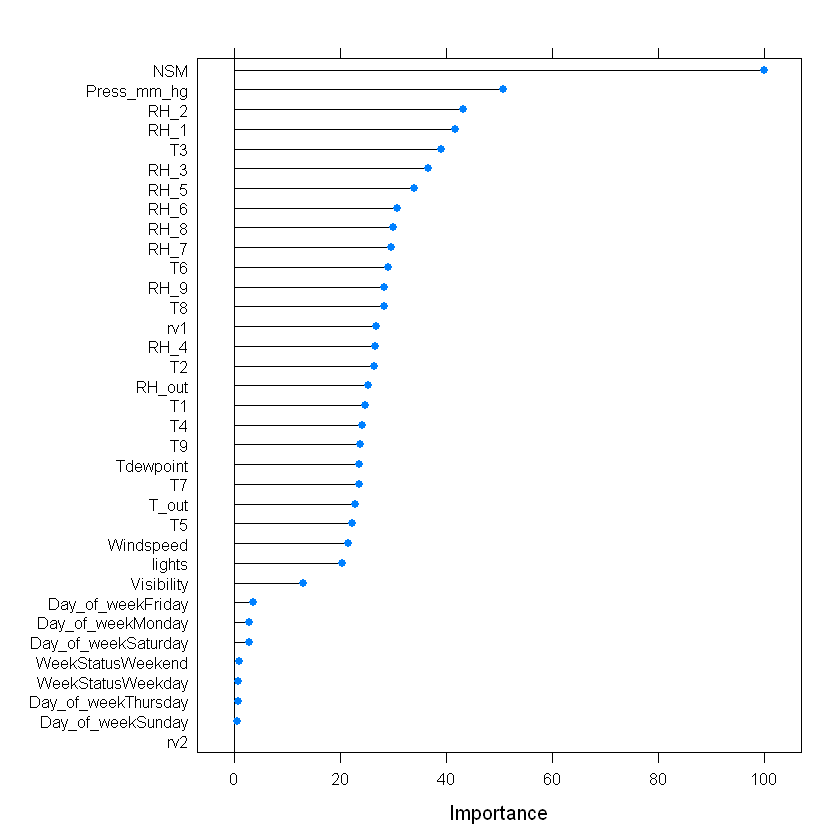

In [24]:
plot(varImp(gbm_model))
png('01 - ML Algorithms/01 - ML - GBM/05-GBM_Algorithm_Feature_Importance_Plot.png',width = 8, height = 6, units = 'in', res = 300)
plot(varImp(gbm_model))
dev.off()

### Linear Regression Model (LM)
#### 2nd ML Algorithm used for regression

**Source:** https://en.wikipedia.org/wiki/Linear_regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.[1] This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.[2]

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.[3] Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications.[4] This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine. 

In [25]:
lmcvFit <- train(Appliances~., data=new_test_data_set[,c(2:37)],  method="lm",trControl = fitControl,
                 metric='RMSE')

Aggregating results
Fitting final model on full training set


In [26]:
lmcvFit
capture.output(lmcvFit, file = "01 - ML Algorithms/02 - ML - LM//00-LM_Algorithm_Output.txt")

Linear Regression 

19735 samples
   35 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 17760, 17761, 17760, 17762, 17763, 17762, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  93.28529  0.1719269  52.88758

Tuning parameter 'intercept' was held constant at a value of TRUE

In [27]:
summary(lmcvFit)
capture.output(summary(lmcvFit), file = "01 - ML Algorithms/02 - ML - LM//01-LM_Algorithm_Summary_Output.txt")


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-243.38  -43.25  -18.46    7.70  938.41 

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.562e+01  9.514e+01  -0.480 0.631553    
lights               1.914e+00  9.605e-02  19.930  < 2e-16 ***
T1                  -4.448e+00  1.857e+00  -2.395 0.016631 *  
RH_1                 1.443e+01  6.721e-01  21.465  < 2e-16 ***
T2                  -1.819e+01  1.628e+00 -11.172  < 2e-16 ***
RH_2                -1.353e+01  7.651e-01 -17.688  < 2e-16 ***
T3                   2.465e+01  1.060e+00  23.246  < 2e-16 ***
RH_3                 5.946e+00  6.782e-01   8.768  < 2e-16 ***
T4                   2.941e-01  1.064e+00   0.276 0.782170    
RH_4                -4.836e-01  6.416e-01  -0.754 0.451012    
T5                  -2.896e-01  1.173e+00  -0.247 0.805023    
RH_5                 3.590e-02  8.719e-02   0.41

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

png 
  2

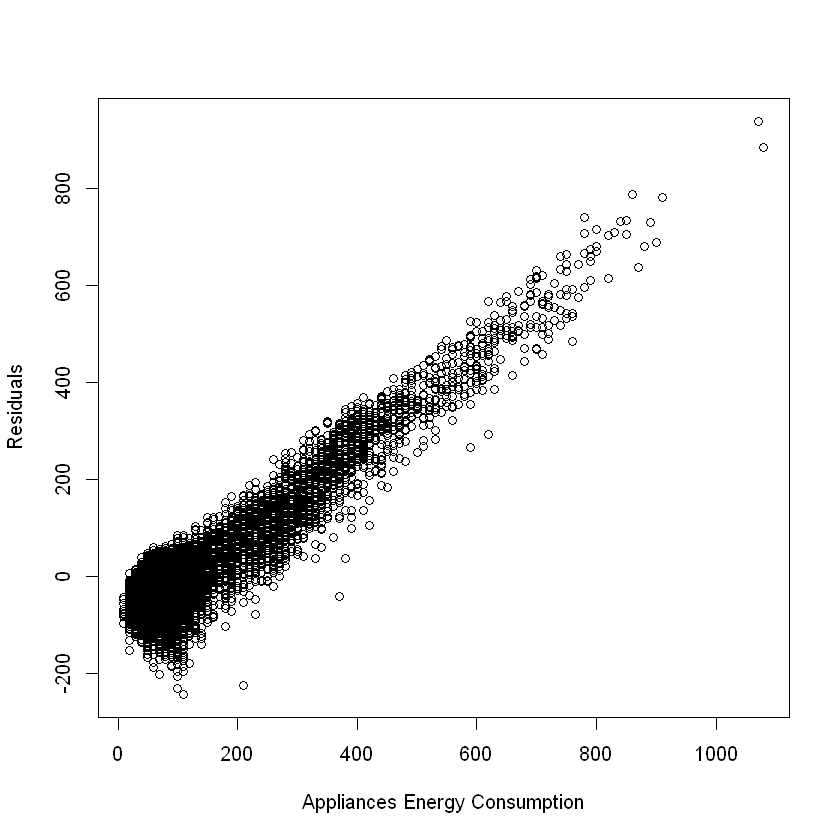

In [28]:
residuals <- resid(lmcvFit)
predictedValues <- predict(lmcvFit)

plot(new_test_data_set$Appliances,residuals,xlab="Appliances Energy Consumption", ylab="Residuals")

png('01 - ML Algorithms/02 - ML - LM/02-LM_Algorithm_Plot.png',width = 8, height = 6, units = 'in', res = 300)
plot(new_test_data_set$Appliances,residuals,xlab="Appliances Energy Consumption", ylab="Residuals")
abline(0,0)
dev.off()

In [29]:
lmcvFit$finalModel
capture.output(lmcvFit$finalModel, 
               file = "01 - ML Algorithms/02 - ML - LM//03-LM_Algorithm_Final_Model_Output.txt")


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
        (Intercept)               lights                   T1  
         -4.562e+01            1.914e+00           -4.448e+00  
               RH_1                   T2                 RH_2  
          1.443e+01           -1.819e+01           -1.353e+01  
                 T3                 RH_3                   T4  
          2.465e+01            5.946e+00            2.941e-01  
               RH_4                   T5                 RH_5  
         -4.836e-01           -2.896e-01            3.590e-02  
                 T6                 RH_6                   T7  
          7.309e+00            2.423e-01            8.570e-01  
               RH_7                   T8                 RH_8  
         -1.257e+00            8.130e+00           -4.361e+00  
                 T9                 RH_9                T_out  
         -1.276e+01           -1.856e-01           -9.614e+00  
        Press_mm_hg               RH_out   

In [30]:
varImp(lmcvFit)
capture.output(varImp(lmcvFit), 
               file = "01 - ML Algorithms/02 - ML - LM//04-LM_Algorithm_Feature_Importance_Output.txt")

lm variable importance

  only 20 most important variables shown (out of 32)

                    Overall
T3                   100.00
RH_1                  92.32
lights                85.71
RH_2                  76.04
T6                    49.48
T2                    47.95
RH_8                  47.52
RH_3                  37.59
Day_of_weekFriday     37.26
T8                    34.58
NSM                   31.82
T9                    30.60
Day_of_weekSaturday   28.13
T_out                 27.12
Windspeed             21.78
Day_of_weekMonday     21.43
RH_6                  15.23
Visibility            14.62
RH_7                  12.38
WeekStatusWeekday     10.99

png 
  2

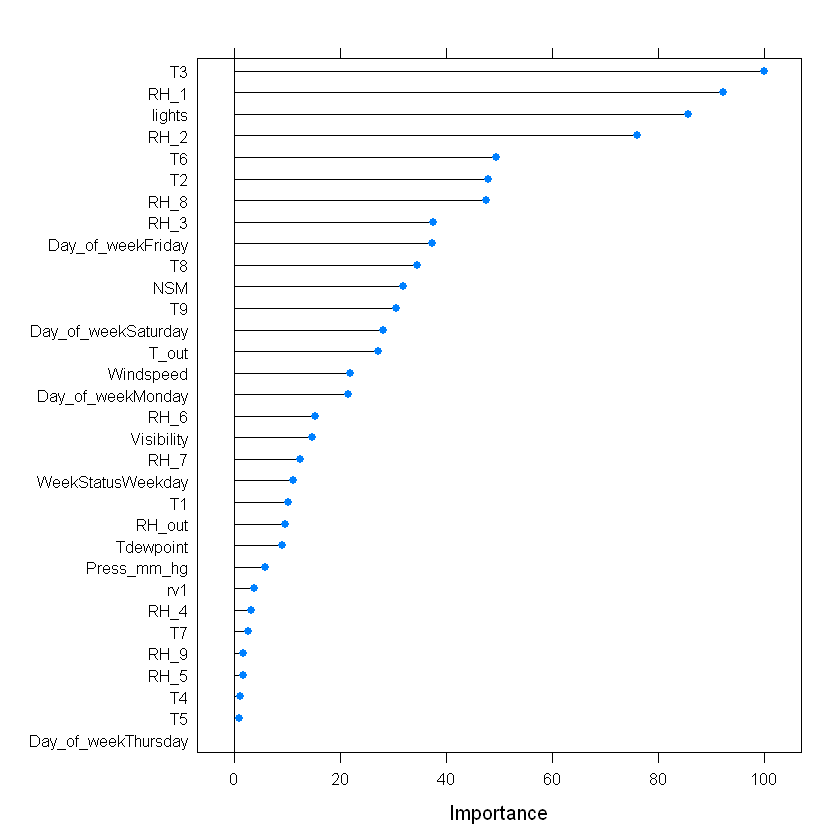

In [31]:
plot(varImp(lmcvFit))
png('01 - ML Algorithms/02 - ML - LM/05-LM_Algorithm_Feature_Importance_Plot.png',width = 8, height = 6, units = 'in', res = 300)
plot(varImp(lmcvFit))
dev.off()

### Support Vector Machine Model (SVM)
#### 3rd ML Algorithm used for regression

**Source:** https://en.wikipedia.org/wiki/Support_vector_machine

In machine learning, support vector machines (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data is unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support vector clustering[2] algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.[citation needed] 

In [32]:
#include the appropriate libraries
suppressWarnings(library(caret))

grid <- expand.grid(sigma = c(0.35,0.4,0.1),
                     C = c(1,3.0,5.0,8.0,10,12))

set.seed(1)
registerDoParallel(8)
getDoParWorkers()

ptm <- proc.time()

[1] 8

In [33]:
svm_model <- train(Appliances~., data=new_test_data_set[,c(2:37)],  method="svmRadial",
                    metric='RMSE',trControl = fitControl, preProc=c("center","scale"),
                    tuneGrid = grid)
svm_time <- proc.time() - ptm

Aggregating results
Selecting tuning parameters
Fitting sigma = 0.1, C = 12 on full training set


In [34]:
svm_model
capture.output(svm_model, 
                   file = "01 - ML Algorithms/03 - ML - SVM/00-SVM_Algorithm_Output.txt")

Support Vector Machines with Radial Basis Function Kernel 

19735 samples
   35 predictor

Pre-processing: centered (35), scaled (35) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 17761, 17762, 17762, 17759, 17761, 17762, ... 
Resampling results across tuning parameters:

  sigma  C   RMSE      Rsquared   MAE     
  0.10    1  81.67069  0.4153741  34.41613
  0.10    3  78.14632  0.4392560  34.03026
  0.10    5  76.89257  0.4491892  34.16858
  0.10    8  75.95068  0.4581702  34.43683
  0.10   10  75.62117  0.4617490  34.63139
  0.10   12  75.42893  0.4641009  34.83293
  0.35    1  81.29253  0.4146122  35.27822
  0.35    3  77.79462  0.4290846  35.92423
  0.35    5  77.62772  0.4288055  36.69855
  0.35    8  78.21746  0.4243723  37.60148
  0.35   10  78.70566  0.4208207  38.08106
  0.35   12  79.20259  0.4171485  38.49339
  0.40    1  81.71759  0.4096950  35.59432
  0.40    3  78.12410  0.4237357  36.30280
  0.40    5  78.02696  0.4224907  37.11222
  

In [35]:
svm_time
capture.output(svm_model, 
                   file = "01 - ML Algorithms/03 - ML - SVM/01-SVM_Algorithm_Time_Output.txt")

    user   system  elapsed 
  529.00     2.75 28326.56 

png 
  2

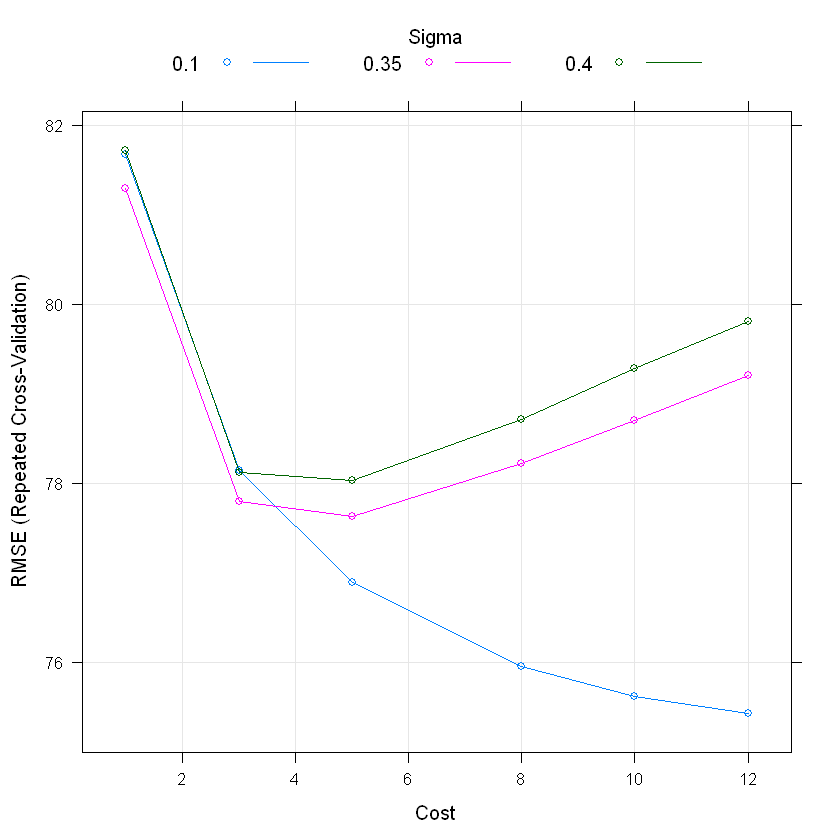

In [36]:
plot(svm_model)
png('01 - ML Algorithms/03 - ML - SVM/02-SVM_Algorithm_Plot.png',width=8, height=6, units='in', res=300)
plot(svm_model)
dev.off()

In [37]:
varImp(svm_model)
capture.output(varImp(svm_model), 
               file = "01 - ML Algorithms/03 - ML - SVM/03-SVM_Algorithm_Feature_Importance_Output.txt")

loess r-squared variable importance

  only 20 most important variables shown (out of 35)

                  Overall
NSM               100.000
lights             82.533
RH_out             49.178
RH_6               39.167
T6                 31.614
T2                 30.575
RH_8               29.876
T_out              20.850
RH_7               17.387
Windspeed          16.096
RH_1               15.696
T3                 15.343
RH_5               10.626
RH_2                7.753
T1                  6.520
Day_of_weekMonday   6.254
RH_9                5.616
T4                  3.441
T8                  3.321
RH_3                2.793

png 
  2

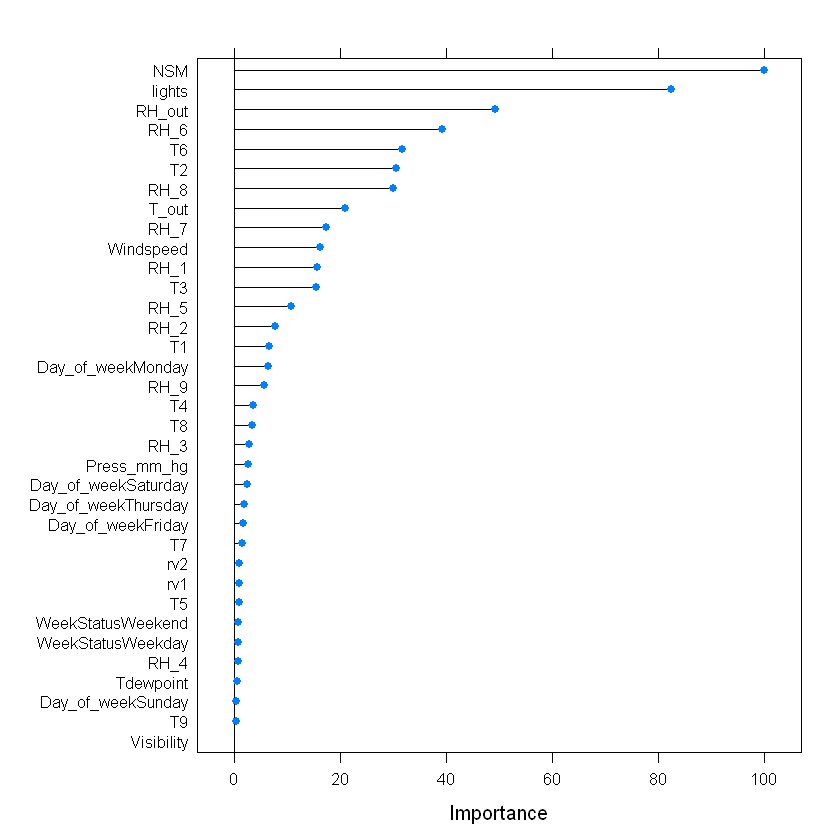

In [38]:
plot(varImp(svm_model))
png('01 - ML Algorithms/03 - ML - SVM/04-SVM_Algorithm_Feature_Importance_Plot.png',
    width=8, height=6, units='in', res=300)
plot(varImp(svm_model))
dev.off()

### Random Forest Model (RF)
#### 4th ML Algorithm used for regression

**Source:** https://en.wikipedia.org/wiki/Random_forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.[3]:587–588

The first algorithm for random decision forests was created by Tin Kam Ho[1] using the random subspace method,[2] which, in Ho's formulation, is a way to implement the "stochastic discrimination" approach to classification proposed by Eugene Kleinberg.[4][5][6]

An extension of the algorithm was developed by Leo Breiman[7] and Adele Cutler,[8] and "Random Forests" is their trademark.[9] The extension combines Breiman's "bagging" idea and random selection of features, introduced first by Ho[1] and later independently by Amit and Geman[10] in order to construct a collection of decision trees with controlled variance. 

In [39]:
fitControl <- trainControl(method = "repeatedcv", # cv
                           number=10,repeats=3,  # 10  # 10,3
                           verboseIter = TRUE,returnResamp = "all")
set.seed(1)
registerDoParallel(7)
getDoParWorkers()

ptm <- proc.time()

[1] 7

In [40]:
rf_model <- train(Appliances~., data=new_test_data_set[,c(2:37)],
                    method="rf",metric='RMSE',
                    trControl=fitControl,importance = TRUE )

rf_model_time <- proc.time() - ptm

Aggregating results
Selecting tuning parameters
Fitting mtry = 18 on full training set


In [41]:
rf_model
capture.output(rf_model, 
               file="01 - ML Algorithms/04 - ML - RF/00-RF_Algorithm_Output.txt")

Random Forest 

19735 samples
   35 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 17761, 17762, 17762, 17759, 17761, 17762, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    67.73217  0.5887746  32.05898
  18    66.38371  0.5847599  31.40975
  35    67.34966  0.5698876  31.81244

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 18.

In [42]:
rf_model_time
capture.output(rf_model_time, 
               file="01 - ML Algorithms/04 - ML - RF/01-RF_Algorithm_Time_Output.txt")

    user   system  elapsed 
  516.91     0.50 10426.28 

null device 
          1

Saving 6.67 x 6.67 in image


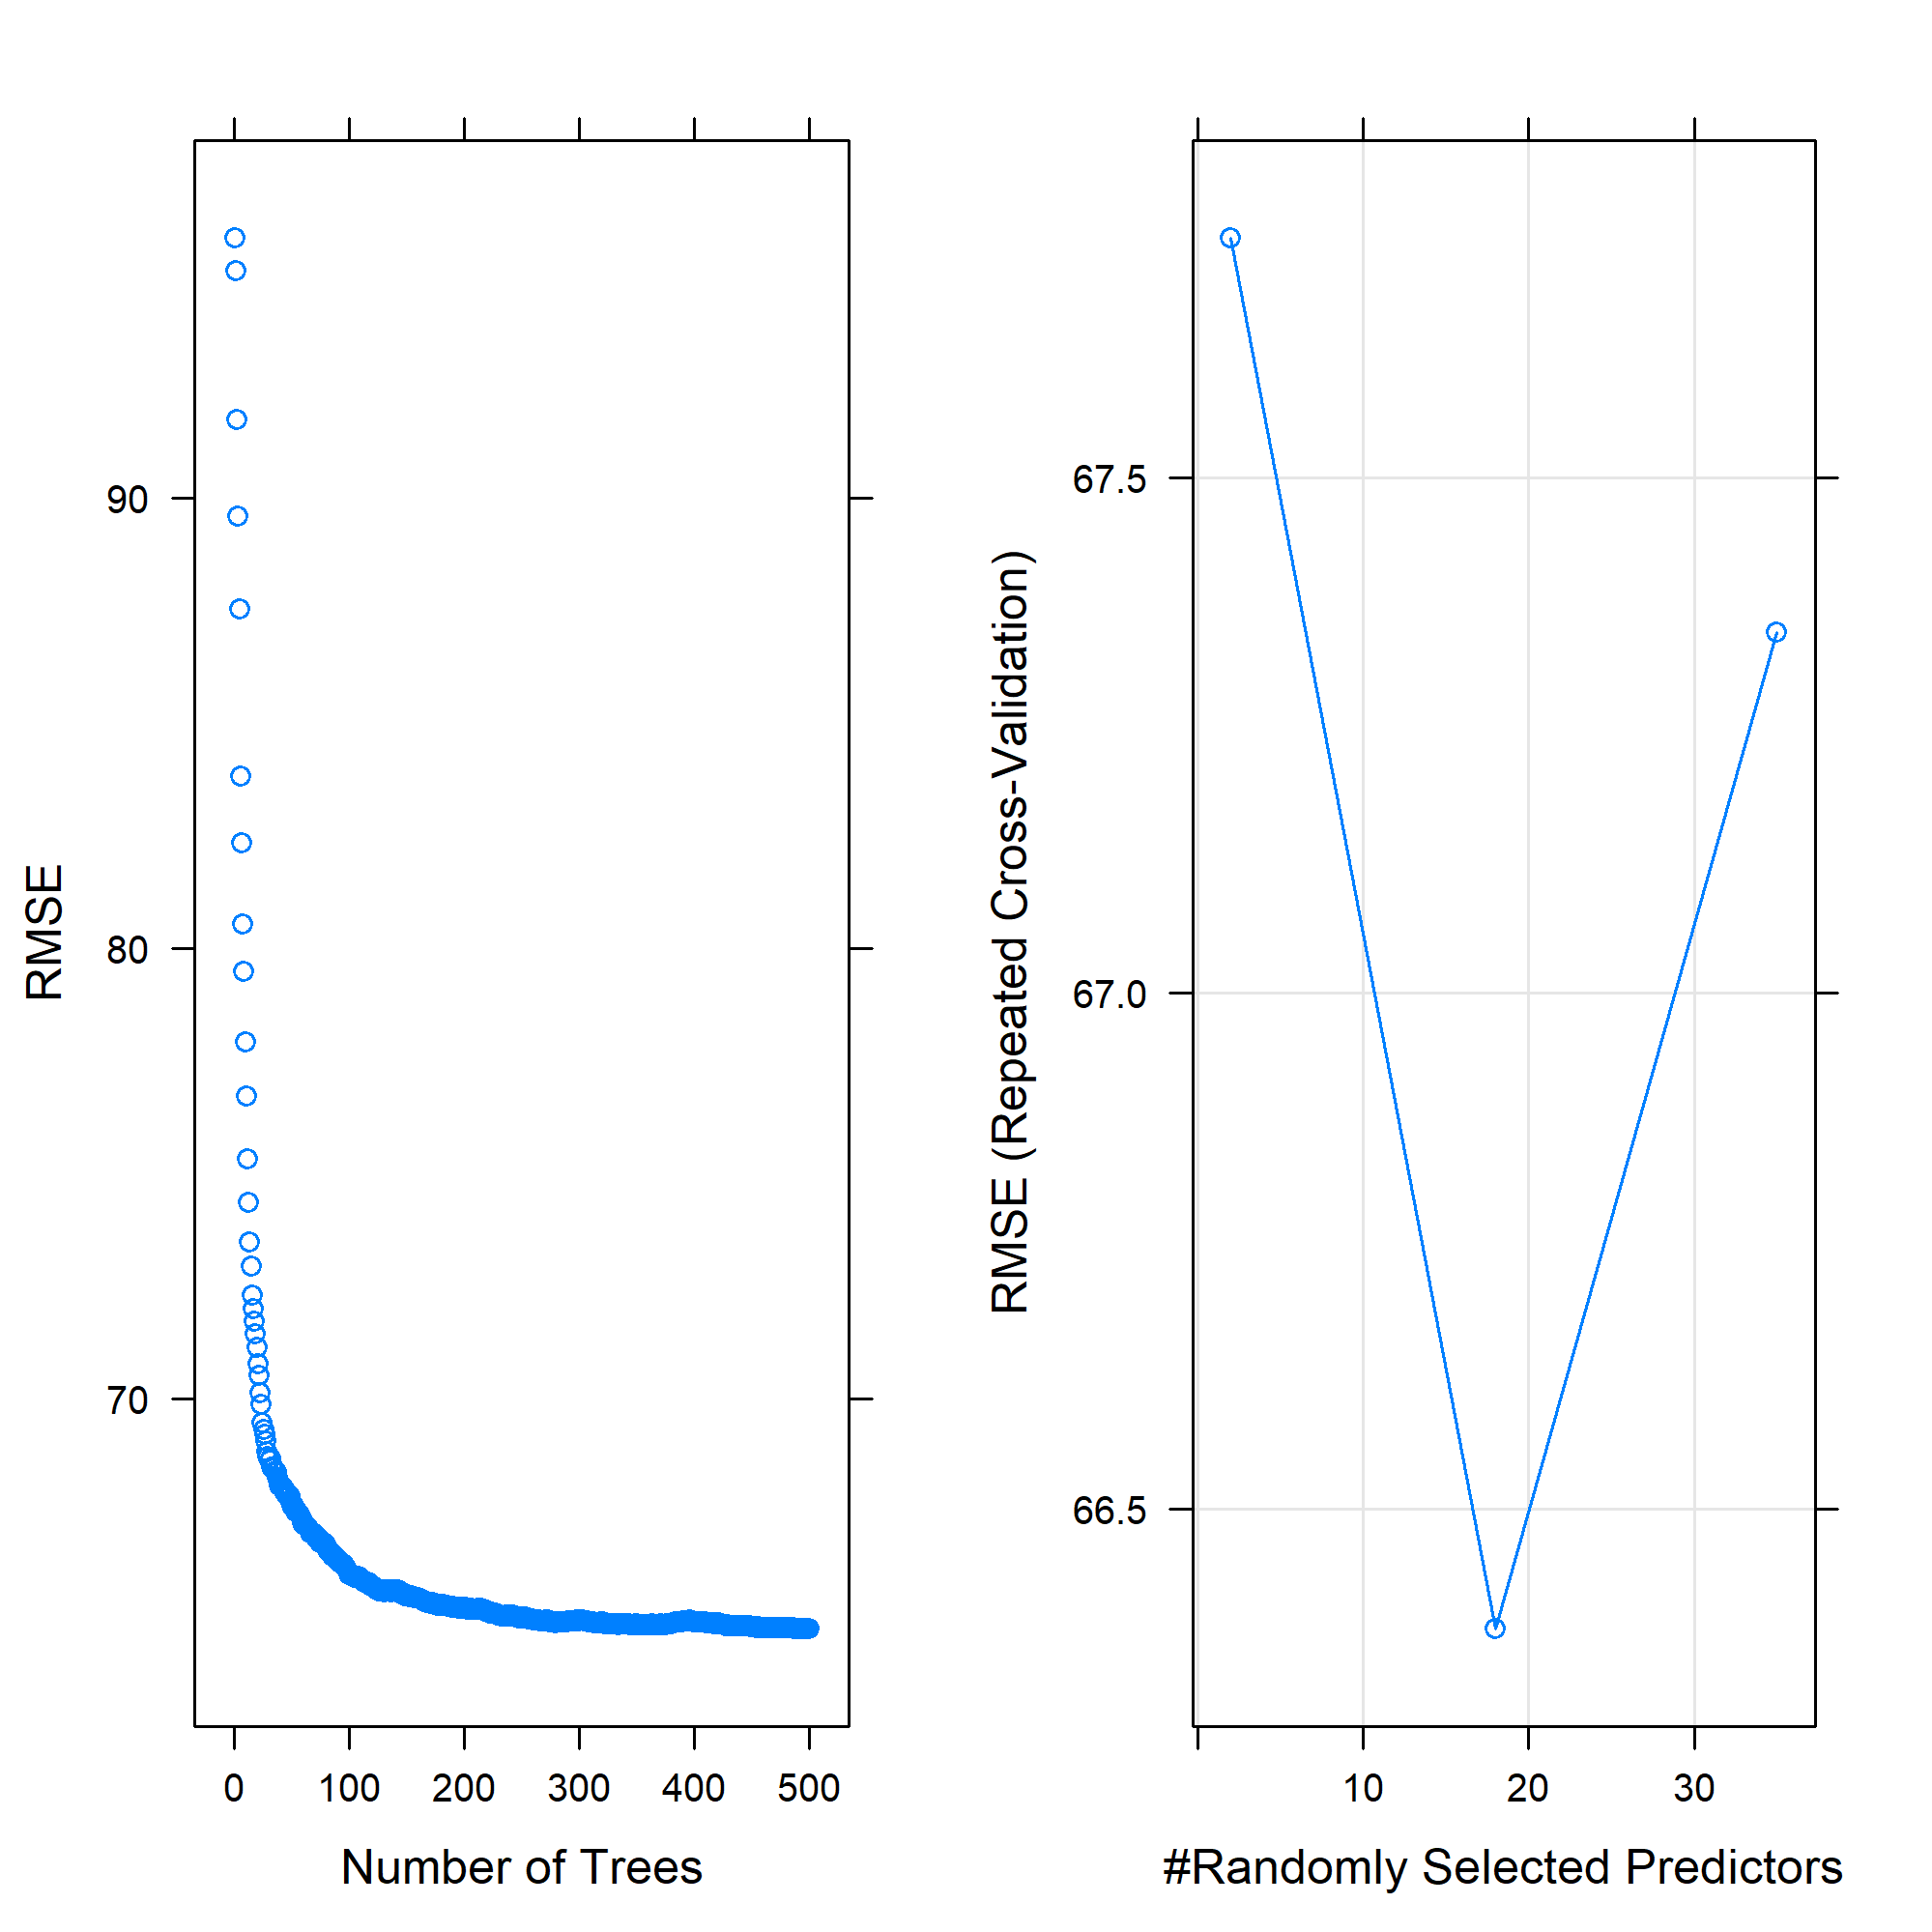

In [43]:
#Include Libraries Needed
suppressWarnings(library(gridBase))
suppressWarnings(library(gridExtra))
suppressWarnings(library(lattice))
suppressWarnings(library(IRdisplay))

x <- 1:500
y <- sqrt(rf_model$finalModel$mse)
n_trees <- xyplot(y ~ x, 
                  ylab="RMSE", 
                  xlab="Number of Trees")
dev.off()

rf_g <- plot(1:500,
             sqrt(rf_model$finalModel$mse),
             type='l',
             col='blue',
             axes=TRUE,
             xlab="Number of Trees",
             ylab="RMSE")

tress_g <- plot(rf_model)

panel_plot <- grid.arrange(n_trees, tress_g,ncol=2)

ggsave(file="01 - ML Algorithms/04 - ML - RF/02-RF_Algorithm_Plot.png", panel_plot)

display_png(file="01 - ML Algorithms/04 - ML - RF/02-RF_Algorithm_Plot.png")

In [44]:
varImp(rf_model)
capture.output(varImp(rf_model), 
               file="01 - ML Algorithms/04 - ML - RF/03-RF_Algorithm_Feature_Importance_Output.txt")

rf variable importance

  only 20 most important variables shown (out of 35)

            Overall
NSM          100.00
lights        56.58
RH_5          33.48
Press_mm_hg   31.77
T3            26.97
Tdewpoint     25.65
Visibility    24.45
RH_3          23.18
T8            23.08
Windspeed     21.92
T5            21.57
RH_1          21.18
RH_7          20.61
RH_9          20.12
RH_2          19.58
RH_6          18.47
T9            18.28
T1            18.16
T7            17.40
RH_4          17.25

png 
  2

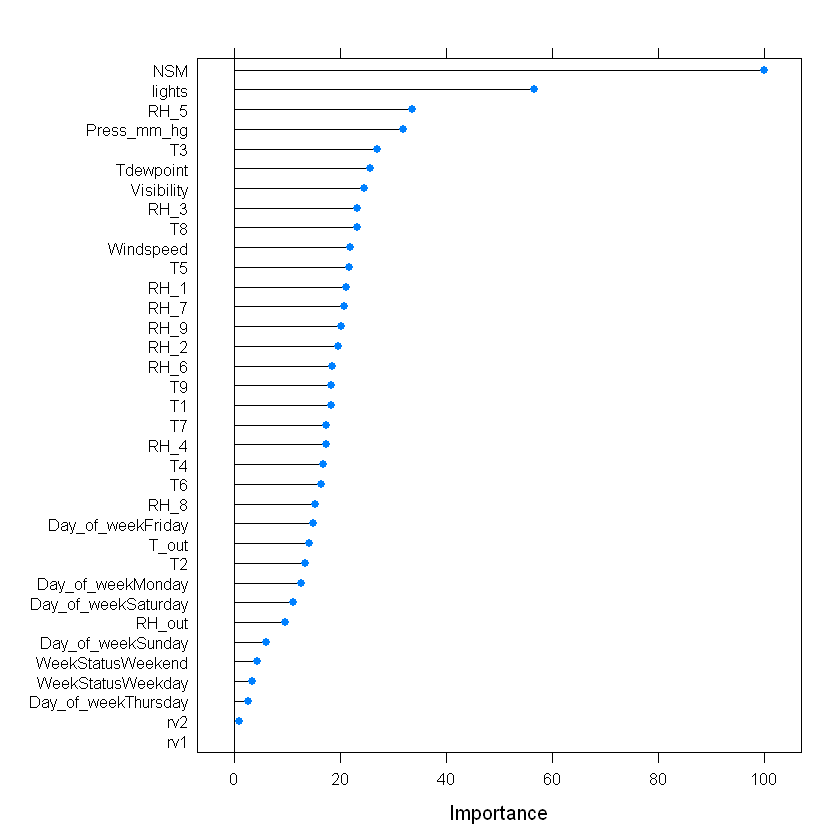

In [45]:
plot(varImp(rf_model))
png('01 - ML Algorithms/04 - ML - RF/04-RF_Algorithm_Feature_Importance_Plot.png',
    width=8, height=6, units='in', res=300)
plot(varImp(rf_model))
dev.off()

### 4 ML Performance Comparison
#### Table and graphics to display performance results

In [46]:
rvalues <- resamples(list(SVM_Radial=svm_model,GBM=gbm_model,Lm=lmcvFit,RF=rf_model))

Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'SVM_Radial' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'GBM' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'Lm' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'RF' did not have 'returnResamp="final"; the optimal tuning parameters are used"

In [47]:
rvalues$values
capture.output(rvalues$values,
               file = "01 - ML Algorithms/00-Algorithm_Performance_Table.txt")
write.csv(rvalues$values, file="01 - ML Algorithms/01-Algorithm_Performance_CSV.csv")

Resample,SVM_Radial~MAE,SVM_Radial~RMSE,SVM_Radial~Rsquared,GBM~MAE,GBM~RMSE,GBM~Rsquared,Lm~MAE,Lm~RMSE,Lm~Rsquared,RF~MAE,RF~RMSE,RF~Rsquared
Fold01.Rep1,35.31233,74.83365,0.5006124,36.37178,67.87675,0.5861215,50.99779,91.16650,0.1960147,32.82145,68.75553,0.5810475
Fold01.Rep2,35.86000,78.26100,0.4663237,36.84295,69.95731,0.5692254,50.83577,90.92870,0.1745717,33.06931,71.48696,0.5546938
Fold01.Rep3,34.01653,72.30013,0.4695567,35.19830,64.41435,0.5738568,53.77212,96.42874,0.1391230,31.27601,64.18459,0.5795770
Fold02.Rep1,33.57198,71.66435,0.5339042,34.02183,63.29239,0.6332522,54.67597,97.76505,0.1449063,31.49990,65.06194,0.6191428
Fold02.Rep2,35.09878,75.38483,0.4424077,35.49983,65.69613,0.5730276,54.03019,95.99897,0.1403566,31.57402,67.00541,0.5573070
Fold02.Rep3,35.25898,74.70821,0.5018132,35.67107,65.91912,0.6063948,53.49292,92.88051,0.1678614,31.53499,65.92057,0.6155952
Fold03.Rep1,35.97358,79.87796,0.4755267,35.63941,68.13112,0.6140233,54.46571,96.83897,0.1753241,32.08407,69.92658,0.6068144
Fold03.Rep2,34.10861,73.37160,0.4317034,35.80701,66.44635,0.5332584,52.98697,94.82001,0.1710676,31.27546,66.53268,0.5277466
Fold03.Rep3,34.49955,76.03775,0.4450430,35.91250,68.58610,0.5438687,55.27576,96.82791,0.1603940,32.78406,70.71303,0.5154031
Fold04.Rep1,35.07925,74.80838,0.4192098,35.86574,67.94725,0.5162529,53.10643,96.51895,0.1859176,30.84778,66.40368,0.5387394


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name                      grob
1 1 (1-1,1-1) arrange lattice[GRID.lattice.129]
2 2 (1-1,2-2) arrange lattice[GRID.lattice.130]

Saving 6.67 x 6.67 in image


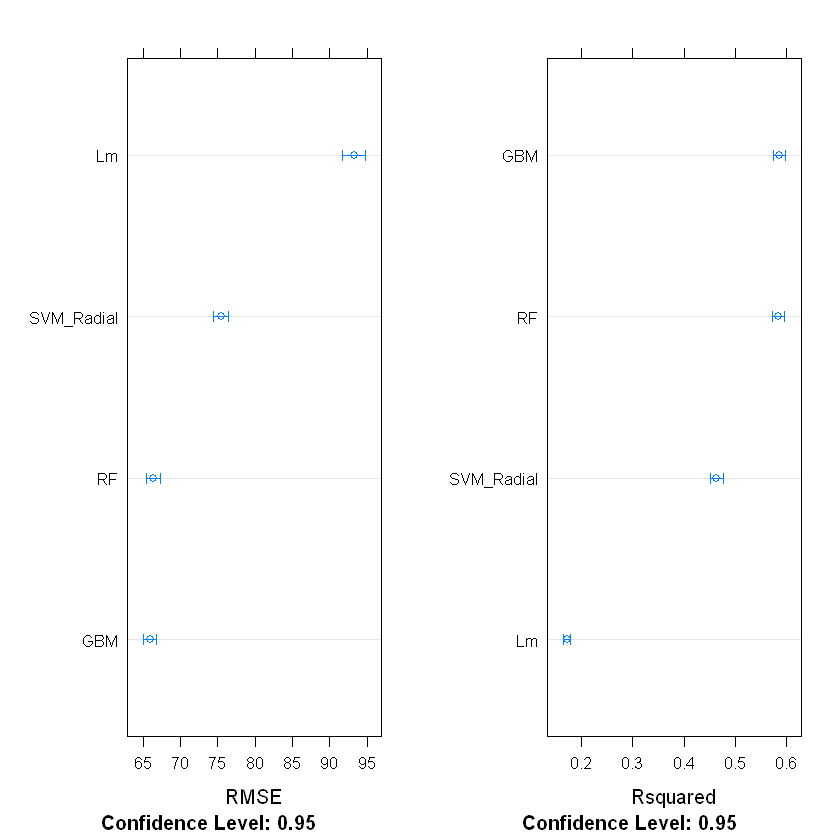

In [48]:
RMSE_ALL <- dotplot(rvalues,metric = "RMSE")

RSQ_ALL <- dotplot(rvalues,metric="Rsquared")

panel_plot_models <- grid.arrange(RMSE_ALL, RSQ_ALL,ncol=2)

panel_plot_models
ggsave(file="01 - ML Algorithms/02-ML_Algorithms_Performance_Plot.png", panel_plot_models)

# Contribution

As a contribution to the research I have included the principal components analysis and k-Nearest Neighbors.

Principal components analysis is used to help us eliminate irrelevant features or reduce noise of the data set.

From the prototype model family in caret, I have selected k-Nearest Neighbors.

### Dimensionality Reduction
#### Principle Component Analysis

**Source:** https://en.wikipedia.org/wiki/Principal_component_analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are n {\displaystyle n} n observations with p {\displaystyle p} p variables, then the number of distinct principal components is min ( n − 1 , p ) {\displaystyle \min(n-1,p)} {\displaystyle \min(n-1,p)}. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables. 

**Class Notes:**

The goal of PCA is to reduce the number of dimensions, and transfer interdependent variables into single and independent components.

To achieve this PCA:
* Transforms the data into a lower dimensional space, by constructing dimensions that are linear combinations of the input dimensions / features.
* Finds independent dimensions along which data have the largest variance.

### K-Nearest Neighbors
#### 5th ML Algorithm used for regression

**Source:** https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. 

In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

Both for classification and regression, a useful technique can be used to assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.[2] 

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required. 

In [49]:
fitControl <- trainControl(method = "repeatedcv", # cv
                           number=10,repeats=3,  # 10  # 10,3
                           verboseIter = TRUE,returnResamp = "all")
set.seed(1)
registerDoParallel(6)
getDoParWorkers()

[1] 6

In [53]:
ptm <- proc.time()

knn_model <- train(Appliances~., 
                   data=new_test_data_set[,c(2:37)],
                   method="knn",
                   metric='RMSE',
                   trControl=fitControl,
                   importance = TRUE )

knn_model_time <- proc.time() - ptm

Aggregating results
Selecting tuning parameters
Fitting k = 9 on full training set


In [56]:
knn_model
capture.output(knn_model, 
               file="01 - ML Algorithms/05 - ML - KNN/00-KNN_Algorithm_Output.txt")

k-Nearest Neighbors 

19735 samples
   35 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 17762, 17761, 17762, 17761, 17762, 17760, ... 
Resampling results across tuning parameters:

  k  RMSE       Rsquared   MAE     
  5  100.80887  0.1002063  54.63894
  7   98.79326  0.1114832  53.83662
  9   97.56549  0.1202519  53.12150

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.

In [57]:
knn_model_time
capture.output(knn_model_time, 
               file="01 - ML Algorithms/05 - ML - KNN/01-KNN_Algorithm_Time_Output.txt")

   user  system elapsed 
   0.78    0.16   46.96 

png 
  2

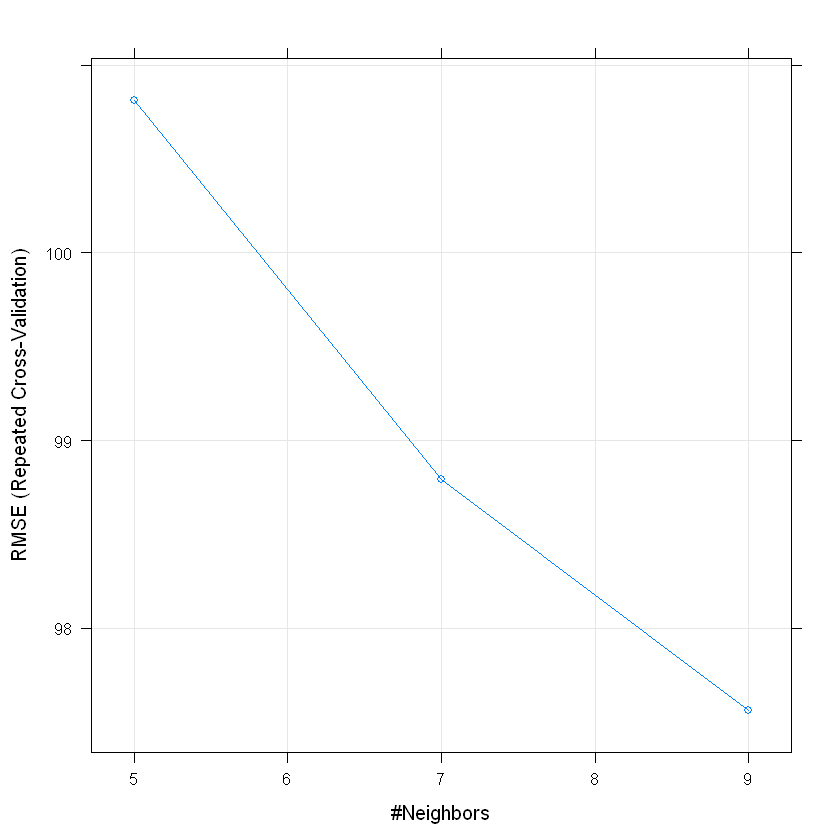

In [58]:
plot(knn_model)
png('01 - ML Algorithms/05 - ML - KNN/02-KNN_Algorithm_Plot.png',width=8, height=6, units='in', res=300)
plot(knn_model)
dev.off()

In [60]:
varImp(knn_model)
capture.output(varImp(knn_model), 
               file="01 - ML Algorithms/05 - ML - KNN/03-KNN_Algorithm_Feature_Importance_Output.txt")

loess r-squared variable importance

  only 20 most important variables shown (out of 35)

                  Overall
NSM               100.000
lights             82.533
RH_out             49.178
RH_6               39.167
T6                 31.614
T2                 30.575
RH_8               29.876
T_out              20.850
RH_7               17.387
Windspeed          16.096
RH_1               15.696
T3                 15.343
RH_5               10.626
RH_2                7.753
T1                  6.520
Day_of_weekMonday   6.254
RH_9                5.616
T4                  3.441
T8                  3.321
RH_3                2.793

png 
  2

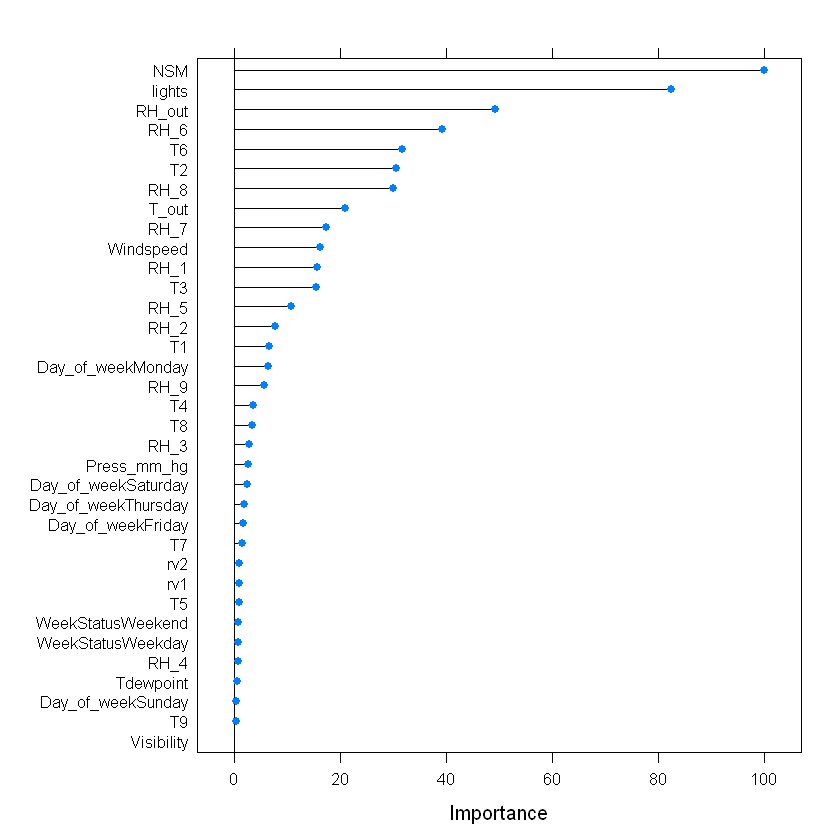

In [61]:
plot(varImp(knn_model))
png('01 - ML Algorithms/05 - ML - KNN/04-KNN_Algorithm_Feature_Importance_Plot.png',
    width=8, height=6, units='in', res=300)
plot(varImp(knn_model))
dev.off()

### 5 ML Performance Comparison
#### Table and graphics to display performance results

In [62]:
rvalues2 <- resamples(list(SVM_Radial=svm_model,GBM=gbm_model,Lm=lmcvFit,RF=rf_model,KNN=knn_model))

Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'SVM_Radial' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'GBM' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'Lm' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'RF' did not have 'returnResamp="final"; the optimal tuning parameters are used"Warning message in resamples.default(list(SVM_Radial = svm_model, GBM = gbm_model, :
"'KNN' did not have 'returnResamp="final"; the optimal tuning parameters are used"

In [64]:
rvalues2$values
capture.output(rvalues2$values,
               file = "01 - ML Algorithms/03-Algorithm_Performance_Table_Including_Contribution.txt")
write.csv(rvalues2$values, file="01 - ML Algorithms/04-Algorithm_Performance_CSV_Including_Contribution.csv")

Resample,SVM_Radial~MAE,SVM_Radial~RMSE,SVM_Radial~Rsquared,GBM~MAE,GBM~RMSE,GBM~Rsquared,Lm~MAE,Lm~RMSE,Lm~Rsquared,RF~MAE,RF~RMSE,RF~Rsquared,KNN~MAE,KNN~RMSE,KNN~Rsquared
Fold01.Rep1,35.31233,74.83365,0.5006124,36.37178,67.87675,0.5861215,50.99779,91.16650,0.1960147,32.82145,68.75553,0.5810475,53.75001,99.42760,0.12949814
Fold01.Rep2,35.86000,78.26100,0.4663237,36.84295,69.95731,0.5692254,50.83577,90.92870,0.1745717,33.06931,71.48696,0.5546938,53.20978,96.02593,0.12986351
Fold01.Rep3,34.01653,72.30013,0.4695567,35.19830,64.41435,0.5738568,53.77212,96.42874,0.1391230,31.27601,64.18459,0.5795770,53.76449,96.64926,0.12239400
Fold02.Rep1,33.57198,71.66435,0.5339042,34.02183,63.29239,0.6332522,54.67597,97.76505,0.1449063,31.49990,65.06194,0.6191428,55.33097,100.63639,0.14666853
Fold02.Rep2,35.09878,75.38483,0.4424077,35.49983,65.69613,0.5730276,54.03019,95.99897,0.1403566,31.57402,67.00541,0.5573070,51.49026,90.55721,0.11422791
Fold02.Rep3,35.25898,74.70821,0.5018132,35.67107,65.91912,0.6063948,53.49292,92.88051,0.1678614,31.53499,65.92057,0.6155952,54.22684,103.75971,0.13330424
Fold03.Rep1,35.97358,79.87796,0.4755267,35.63941,68.13112,0.6140233,54.46571,96.83897,0.1753241,32.08407,69.92658,0.6068144,52.51506,98.53611,0.10954287
Fold03.Rep2,34.10861,73.37160,0.4317034,35.80701,66.44635,0.5332584,52.98697,94.82001,0.1710676,31.27546,66.53268,0.5277466,54.82861,103.83303,0.09180777
Fold03.Rep3,34.49955,76.03775,0.4450430,35.91250,68.58610,0.5438687,55.27576,96.82791,0.1603940,32.78406,70.71303,0.5154031,51.44225,95.74344,0.12634954
Fold04.Rep1,35.07925,74.80838,0.4192098,35.86574,67.94725,0.5162529,53.10643,96.51895,0.1859176,30.84778,66.40368,0.5387394,52.96730,93.68281,0.11936674


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name                      grob
1 1 (1-1,1-1) arrange lattice[GRID.lattice.171]
2 2 (1-1,2-2) arrange lattice[GRID.lattice.172]

Saving 6.67 x 6.67 in image


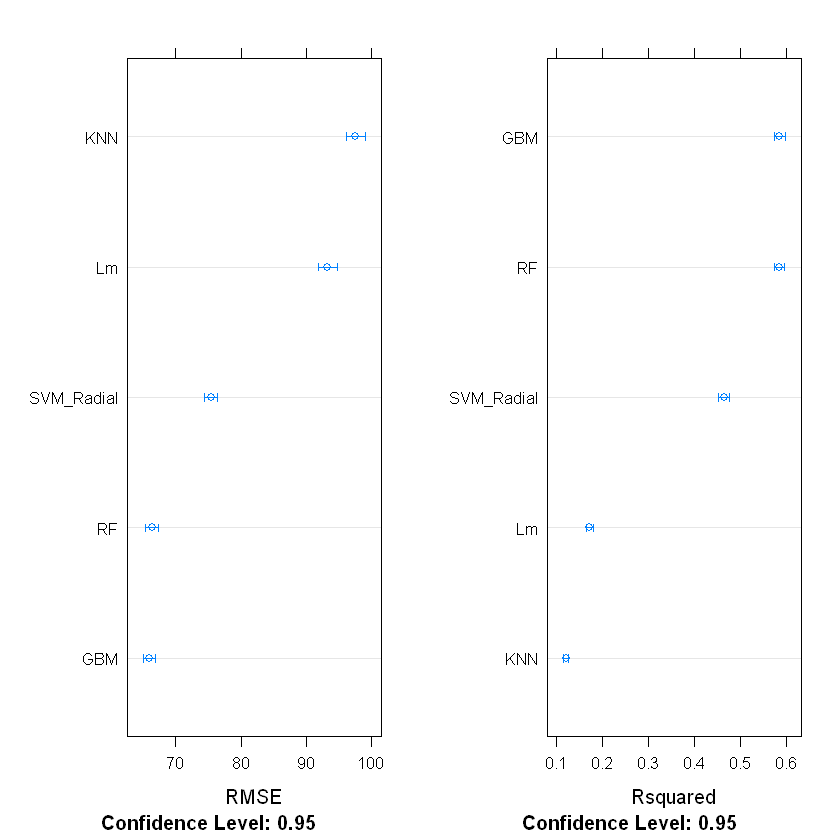

In [65]:
RMSE_ALL <- dotplot(rvalues2,metric = "RMSE")

RSQ_ALL <- dotplot(rvalues2,metric="Rsquared")

panel_plot_models <- grid.arrange(RMSE_ALL, RSQ_ALL,ncol=2)

panel_plot_models
ggsave(file="01 - ML Algorithms/05-ML_Algorithms_Performance_Plot_Including_Contribution.png", panel_plot_models)

#### RMSE and R2 meaning

**Source:** https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

R-squared has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. Improvement in the regression model results in proportional increases in R-squared.

**Application of R2 to Use Cases**

GBM was the model who provided the best prediction with an R2 value close to 0.6. RF prediction closely followed GBM results with an R2 value near 0.6

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. **Lower values of RMSE indicate better fit**. RMSE is a good measure of **how accurately the model predicts the response**, and it is the most important criterion for fit if the main purpose of the model is prediction.

**Application of RMSE to Use Cases**

GBM showed the lowest value of RMSE which indicates the highest accuracy model to predict a response. Closely followed by RF.

**Note:**

Comparing the analysis made between the data set with 4932 instances and the 19735 instances shows a order difference.

In the 4932 the top model was performed by RF instead of GBM.

### Principal Component Regression

**Source:** https://www.r-bloggers.com/performing-principal-components-regression-pcr-in-r/

Principal components regression (PCR) is a regression technique based on principal component analysis (PCA).

The basic idea behind PCR is to calculate the principal components and then use some of these components as predictors in a linear regression model fitted using the typical least squares procedure.

As you can easily notice, the core idea of PCR is very closely related to the one underlying PCA and the “trick” is very similar. In some cases a small number of principal components are enough to explain the vast majority of the variability in the data. For instance, say you have a dataset of 50 variables that you would like to use to predict a single variable. By using PCR you might found out that 4 or 5 principal components are enough to explain 90% of the variance of your data. In this case, you might be better off running PCR on with these 5 components instead of running a linear model on all the 50 variables. This is a rough example but I hope it helped to get the point through.

A core assumption of PCR is that the directions in which the predictors show the most variation are the exact directions associated with the response variable. On one hand, this assumption is not guaranteed to hold 100% of the times, however, even though the assumption is not completely true it can be a good approximation and yield interesting results.

Some of the most notable advantages of performing PCR are the following:

* Dimensionality reduction
* Avoidance of multicollinearity between predictors
* Overfitting mitigation


In [72]:
pcr_results_test_set <- pcr(Appliances~.,
                            data = new_test_data_set[,c(2:37)],
                            scale = TRUE,
                            validation = "CV")

In [82]:
summary(pcr_results_test_set)
capture.output(summary(pcr_results_test_set),
               file="01 - ML Algorithms/06 - Principal Component Regression/01-PCR_Results_Test_Data.txt")

Data: 	X dimension: 19735 35 
	Y dimension: 19735 1
Fit method: svdpc
Number of components considered: 35

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           102.5    102.2    102.2    102.2      101     99.7    98.87
adjCV        102.5    102.2    102.2    102.2      101     99.7    98.86
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       98.77    98.78    98.33     98.22     98.21     97.74     97.74
adjCV    98.77    98.77    98.33     98.21     98.21     97.74     97.74
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        97.72     97.73     97.70     96.77     96.05     95.77     95.77
adjCV     97.72     97.73     97.69     96.76     96.04     95.76     95.76
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        95.71     95.72     95.51     95.44      94.6     94.49     94.27
adjCV     95.71

png 
  2

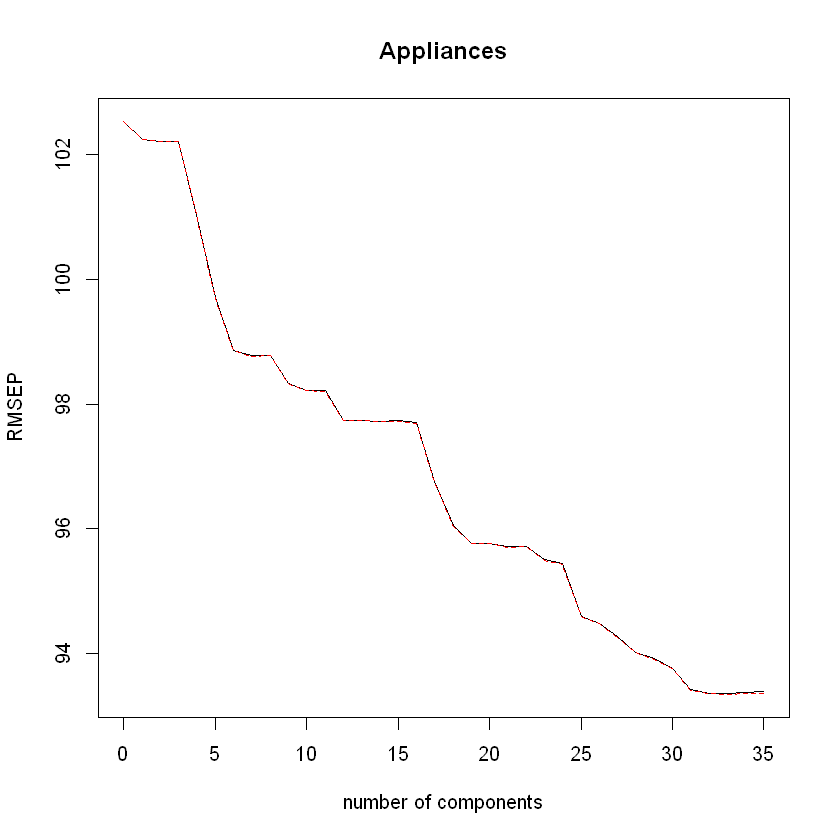

In [77]:
validationplot(pcr_results_test_set)
png('01 - ML Algorithms/06 - Principal Component Regression/02-PCR_Root_Mean_Squared_Error_Plot.png',
    width=8, height=6, units='in', res=300)
validationplot(pcr_results_test_set)
dev.off()

png 
  2

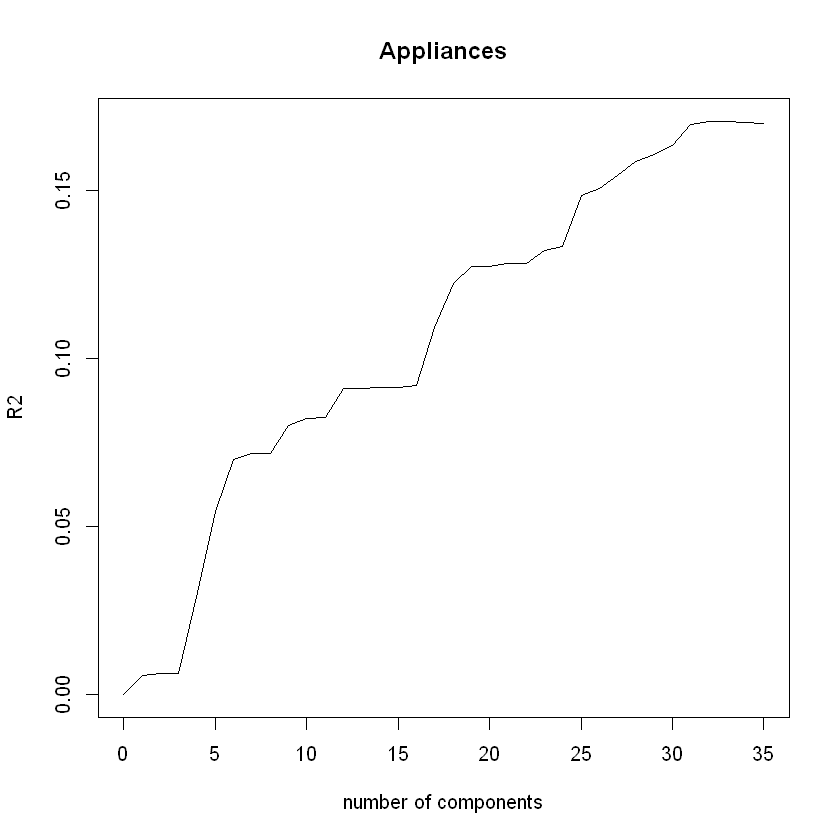

In [78]:
validationplot(pcr_results_test_set, val.type="R2")
png('01 - ML Algorithms/06 - Principal Component Regression/03-PCR_Root_Squared_Plot.png',
    width=8, height=6, units='in', res=300)
validationplot(pcr_results_test_set, val.type="R2")
dev.off()

png 
  2

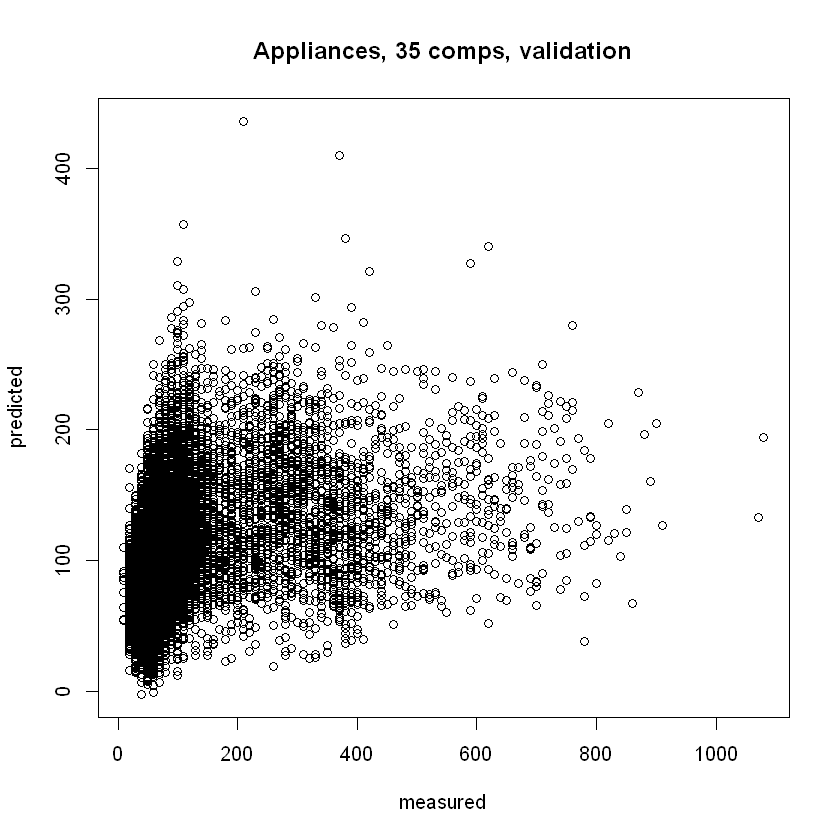

In [81]:
predplot(pcr_results_test_set)
png('01 - ML Algorithms/06 - Principal Component Regression/04-PCR_Predicted_Plot.png',
    width=8, height=6, units='in', res=300)
predplot(pcr_results_test_set)
dev.off()

In [83]:
head(new_test_data_set[,c(2:37)],4)

Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,⋯,rv1,rv2,NSM,WeekStatusWeekday,WeekStatusWeekend,Day_of_weekFriday,Day_of_weekMonday,Day_of_weekSaturday,Day_of_weekSunday,Day_of_weekThursday
60,30,19.89,47.59667,19.2,44.79000,19.79,44.73000,19.00000,45.56667,,13.27543,13.27543,61200,1,0,0,1,0,0,0
60,30,19.89,46.69333,19.2,44.72250,19.79,44.79000,19.00000,45.99250,,18.60619,18.60619,61800,1,0,0,1,0,0,0
50,30,19.89,46.30000,19.2,44.62667,19.79,44.93333,18.92667,45.89000,,28.64267,28.64267,62400,1,0,0,1,0,0,0
50,40,19.89,46.06667,19.2,44.59000,19.79,45.00000,18.89000,45.72333,,45.41039,45.41039,63000,1,0,0,1,0,0,0


In [85]:
library(pryr)
object_size(new_test_data_set)

5.22 MB